In [593]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [594]:
dataset = pd.read_csv("C:/Users/VISHU/3D Objects/Machine Learning/Datasets/drug_deaths.csv")
dataset.shape

(5105, 42)

In [595]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
class DateEmptyColumn(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        Imputer = SimpleImputer(strategy='most_frequent')
        X['Date'] = Imputer.fit_transform(X[['Date']])
        X['Date'] = pd.to_datetime(X['Date'])
        X['year'] = pd.DatetimeIndex(X['Date']).year
        X['month'] = pd.DatetimeIndex(X['Date']).month
        X['day'] = pd.DatetimeIndex(X['Date']).day
        X = X.drop(columns="Date")
        X = X.drop(['ID', 'DateType'], axis=1)
        return X

In [596]:
class RemoveOther(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(['Other', 'ResidenceCity', 'ResidenceState', 'ResidenceCounty', 'DeathCity', 'DeathCounty', 'DescriptionofInjury', 'InjuryPlace', 'InjuryCity', 'InjuryCounty', 'OtherSignifican', 'Unnamed: 0', 'DeathCityGeo', 'ResidenceCityGeo', 'InjuryCityGeo', 'LocationifOther', 'COD'], axis=1)


In [597]:
class AgeCompute(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        Computer = SimpleImputer(strategy="mean")
        X['Age'] = Computer.fit_transform(X[['Age']])
        return X

In [598]:
class SexCompute(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        Impute = SimpleImputer(strategy="most_frequent")
        X['Sex'] = Impute.fit_transform(X[['Sex']])
        return X

In [599]:
class RaceCompute(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        Impute = SimpleImputer(strategy="most_frequent")
        X['Race'] = Impute.fit_transform(X[['Race']])
        return X

In [600]:
class MannerOfDeath(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        Encoder = OneHotEncoder()
        Impute = SimpleImputer(strategy="most_frequent")
        X['MannerofDeath'] = Impute.fit_transform(X[['MannerofDeath']])
        X['MannerofDeath'] = X['MannerofDeath'].str.lower()    # Converting entire column to lower case...
        col = ['accident', 'pending', 'natural']
        matrix = Encoder.fit_transform(X[["MannerofDeath"]]).toarray()
        for i in range(len(matrix.T)):
            X[col[i]] = matrix.T[i]
        return X.drop(['MannerofDeath'], axis=1)

In [601]:
class InjuryState(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        Encoder = OneHotEncoder()
        Impute = SimpleImputer(strategy="constant", fill_value="Unknown")
        X['InjuryState'] = Impute.fit_transform(X[['InjuryState']])
        X['InjuryState'] = X['InjuryState'].str.lower()
        cols = ['unknown', 'ct', 'ny', 'connecticut']
        matrix = Encoder.fit_transform(X[['InjuryState']]).toarray()
        for i in range(len(matrix.T)):
            X[cols[i]] = matrix.T[i]
        return X.drop(['InjuryState'], axis=1)

In [602]:
class UnnecessaryColumns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(['ct', 'ny', 'connecticut', 'hospital', 'residence', 'nursing home', 'convalescent home', 'hospice'], axis=1)

In [603]:
class LocationDeath(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        Impute = SimpleImputer(strategy="most_frequent")
        X['Location'] = Impute.fit_transform(X[['Location']])
        Encoder = OneHotEncoder()
        X['Location'] = X['Location'].str.lower()
        cols = ['hospital', 'residence', 'other', 'nursing home', 'convalescent home', 'hospice']
        matrix = Encoder.fit_transform(X[['Location']]).toarray()
        for i in range(len(matrix.T)):
            X[cols[i]] = matrix.T[i]
        return X.drop(['Location', 'other'], axis=1)
dataset['AnyOpioid'].unique()

array(['0', '1', 'N'], dtype=object)

In [604]:
class ChangeToInteger(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        dict1 = {'Male':1, "Female":0, "Unknown": -1}
        X['Sex'] = [dict1[i] for i in X['Sex']]
        X = X.drop(['Race', 'Fentanyl', 'Fentanyl_Analogue', 'Morphine_NotHeroin'], axis=1)
        dict2 = {"0":0, "1":1, "N":-1}
        X['AnyOpioid'] = [dict2[i] for i in X['AnyOpioid']]
        return X

In [605]:
from sklearn.pipeline import Pipeline
Pipe = Pipeline([
    ("Date", DateEmptyColumn()),
    ("Remove", RemoveOther()),
    ("Age", AgeCompute()),
    ("Sex", SexCompute()),
    ("Race", RaceCompute()),
    ("DeathCause", MannerOfDeath()),
    ("Injuries", InjuryState()),
    ("Location", LocationDeath()),
    ("NotNeeded", UnnecessaryColumns()),
    ("Chnaged", ChangeToInteger())
])
dataset = Pipe.fit_transform(dataset)
dataset.columns

Index(['Age', 'Sex', 'Heroin', 'Cocaine', 'Oxycodone', 'Oxymorphone',
       'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet',
       'Tramad', 'Hydromorphone', 'OpiateNOS', 'AnyOpioid', 'year', 'month',
       'day', 'accident', 'pending', 'natural', 'unknown'],
      dtype='object')

#### Residence City, death city, Death Country and Residence Country have too many unique values so they will not that much affect the relationship of other variables... So we will move them out of the dataset and will later include them...

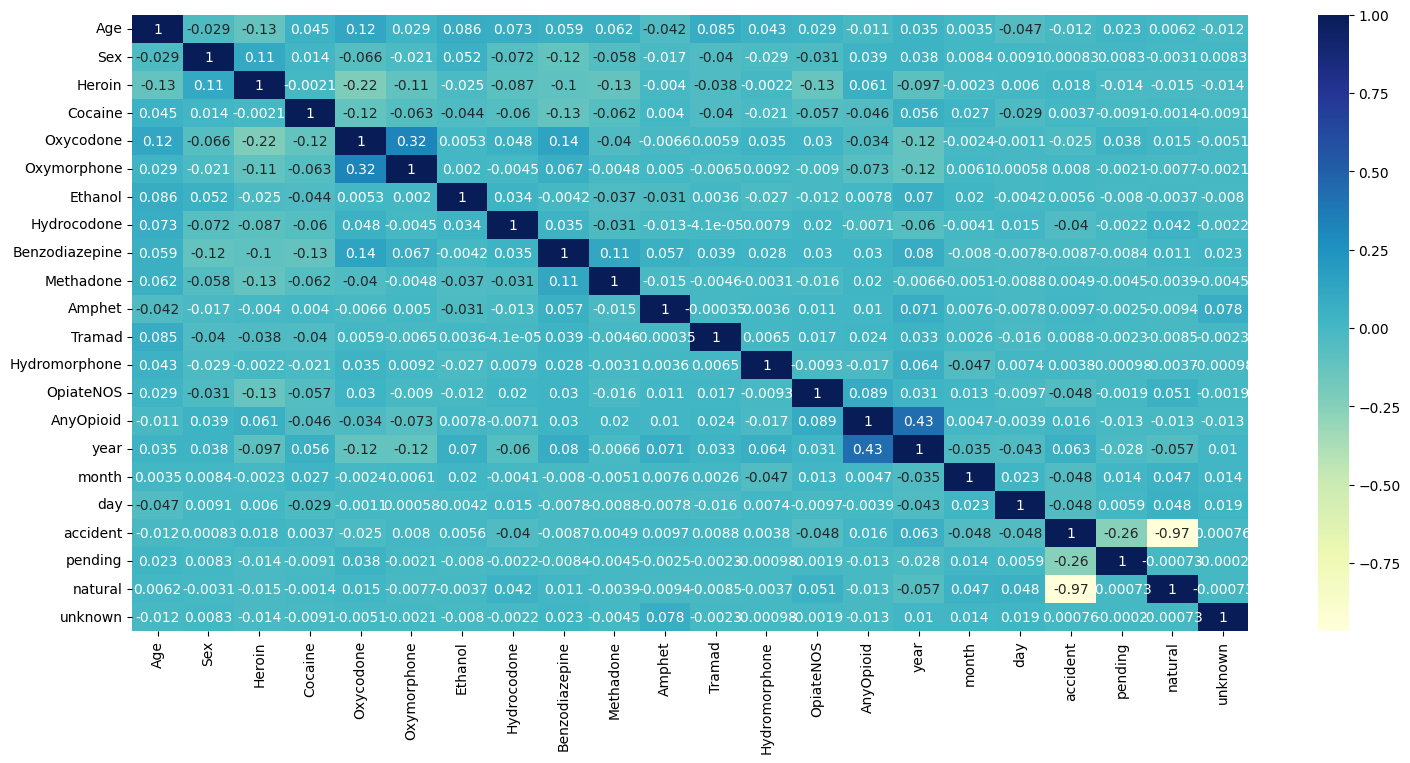

In [606]:
plt.figure(figsize=(18, 8))
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [607]:
Train1 = pd.DataFrame()
Test1 = pd.DataFrame()
from sklearn.model_selection import ShuffleSplit
Shuffle = ShuffleSplit(n_splits=1, test_size=0.3)
for set1, set2 in Shuffle.split(dataset, dataset[['natural', 'unknown', 'accident', 'Age']]):
    for i in range(0, 3):
        Train1 = dataset.loc[set1]
        Test1 = dataset.loc[set2]
print(Train1.shape, Test1.shape)

(3573, 22) (1532, 22)


In [608]:
X = Train1.drop(['Age'], axis=1)
Y = Train1[['Age']]
Ytrain = Test1.drop(['Age'], axis=1)
Ytest = Test1[['Age']]

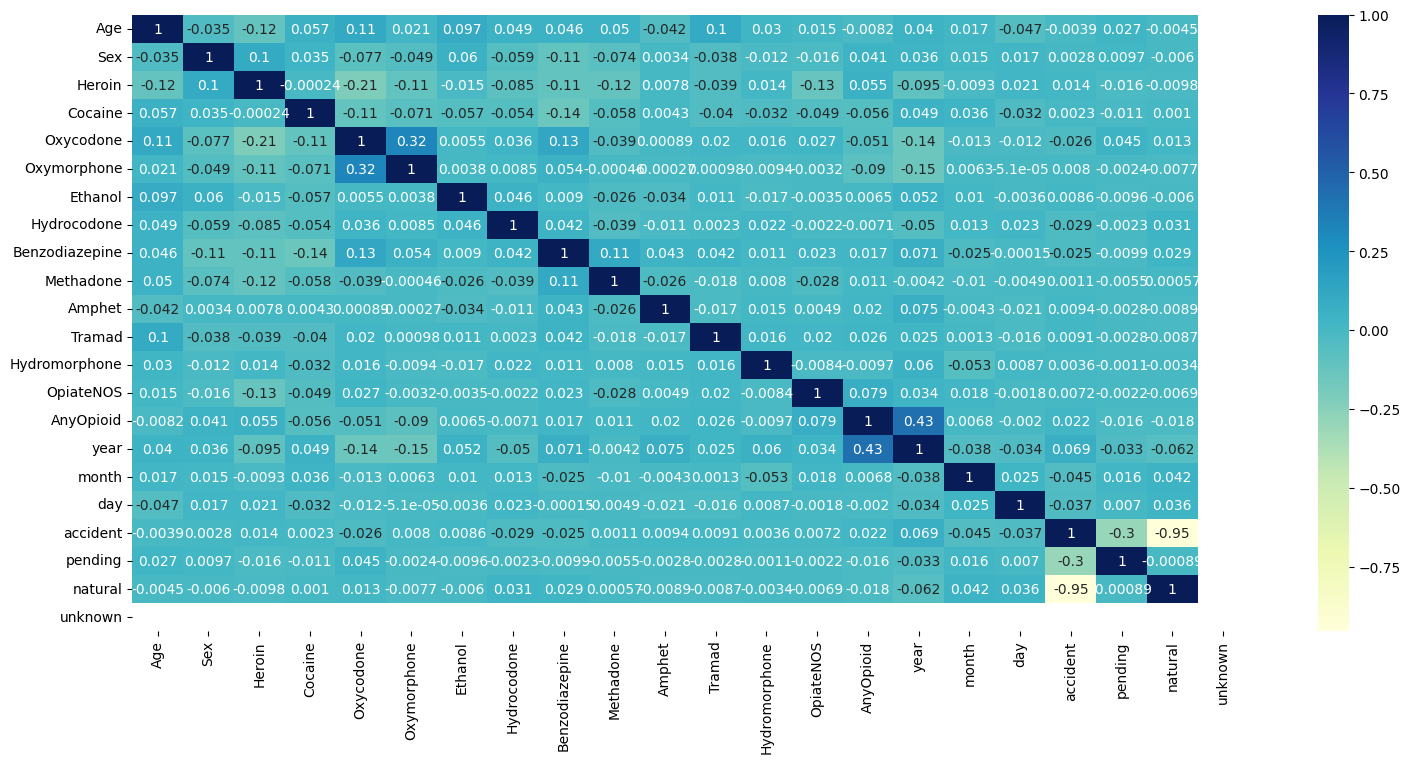

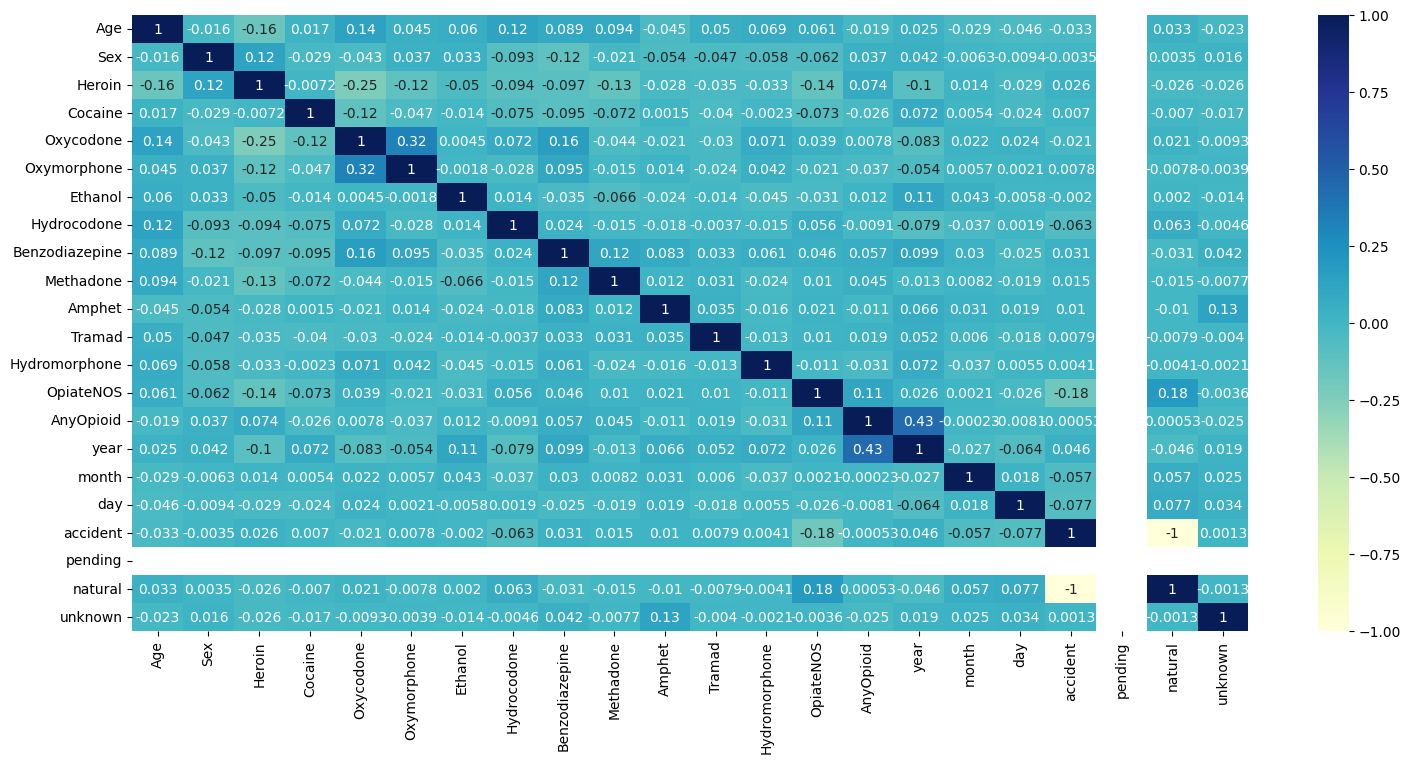

In [609]:
plt.figure(figsize=(18, 8))
sns.heatmap(Train1.corr(), cmap="YlGnBu", annot=True)
plt.figure(figsize=(18, 8))
sns.heatmap(Test1.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [614]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
poly1 = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly1 = poly1.fit_transform(Ytrain)
Regression = LinearRegression()
Regression.fit(X_poly, Y)

LinearRegression()

In [ ]:
Ypred = Regression.predict(Ytrain)